<img src="https://drive.google.com/uc?id=1-d7H1l1lJ28_sLcd9Vvh_N-yro7CJZcZ" style="Width:1000px">

# 🐝 Swarm Behaviour

And now for something completely different! We will leave the `Ensemble` methods for a little while, and come back to binary classifiers. This Data Problem is a modified version of one of the questions that I asked during the assessment in 2021, so this give you a flair for the practical to come. Note that this is a relatively open-ended question. Generally, I also ask a few questions that are more targetted first, and the opened ended question comes at the end. The open ended question is really here for you to show how much you have learned as a data scientists. 

What I am looking for in an open-ended data science problem is:

1. A good solution to the problem asked
2. Clean code
3. That you demonstrate your skills. Remember, if you have not put it on the notebook, I don't see it, so I can't know you have done it (and I won't take your word for it)
4. I also don't want unnecessary code and approaches, and this can impact your grade negatively as it goes against clean code (point number 2).

## Run the cell below to load the data

In [1]:
from nbta.utils import download_data
download_data(id='1JlFoFCQ5eA5WVYuN_AidPx8ypfSkEAgD')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('raw_data/swarm_training.csv')
unknown_behaviour =  pd.read_csv('raw_data/unknown_swarm_behaviour.csv')
data

,yC187,yC148,yC7,yC111,yC32,xC54,xC148,yC193,xC61,yC81,...,yS14,xS2,yS6,yC65,xC18,nS64,yC166,nS55,yS122,Swarm_Behaviour
0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,0.00,0.0
1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,0.00,0.0
2,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,0.00,0.0
3,0.0,0.0,24.75,50.0,100.0,0.0,0.0,18.00,1.0,0.0,...,0.00,0.00,-0.79,12.50,-9.00,1.0,12.500,0.0,-1.19,1.0
4,0.0,50.0,24.75,50.0,100.0,0.0,-1.2,17.50,1.0,99.0,...,0.00,0.00,0.00,12.50,-2.25,1.0,12.500,0.0,-1.41,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,15.0,48.5,24.00,20.0,-85.0,0.0,-4.6,-19.25,3.0,4.0,...,0.00,0.00,0.00,-1.75,-12.75,0.0,10.750,0.0,0.00,1.0
3492,100.0,50.0,25.00,50.0,100.0,0.0,-0.4,25.00,-1.5,100.0,...,0.00,0.00,0.00,12.50,-0.75,0.0,12.500,1.0,0.00,1.0
3493,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.00,0.00,0.00,0.00,0.00,0.0,0.000,1.0,0.00,0.0
3494,-15.0,10.5,-2.00,0.5,-17.0,-19.0,-4.8,-1.00,-16.0,4.0,...,-0.64,-1.57,0.00,4.00,-8.00,1.0,1.125,1.0,0.00,1.0


## Dataset Description

This dataset is about flying species such as birds and insects, and whether they tend to form large groups and 'swarm' when they fly, or not. The dataset contains 50 `features` (different measurement of behaviour) and 1 label (`Swarm_Behaviour`).

`Swarm_Behaviour` can take the values 0 (*not swarming*) or 1 (*swarming*).

The dataset has already been cleaned, scaled and encoded for you, so you do not need to worry about it. 🧽

# What you need to do

You are a data scientist working for a non-profit looking at endangered eco-systems. You are given the dataset above, and are asked to train a `LogisticRegression` model to predict `Swarm_Behaviour` in new, unseen samples. 

Your bosses also give you the following directions:
* The algorithm needs to be a `LogisticRegression` algorithm - Upper management will discard any model more complex
* You need to train your model to achieve the highest possible **precision** using the labelled dataset (`data`) above 
* However, management requires your algorithm to have a **recall** of ***at least 70%***
* Once you are happy with your final trained algorithm, you are asked to save it into a variable named `final_model` 
* You are then asked to make predictions about the swarming behaviour of unclassified species given in the `unknown_behaviour` dataframe above, and to save your predictions in a variable named `predictions`

GOOD LUCK! 🧧

<h1 style="color:green">FAIR WARNING:</h1>
<p>This solution is quite complete, and this is <strong style="color:blue">more than what you need to do to get a first class mark</strong> at the test. But it gives you a good idea of what a possible first class solution is, and what the best practice approach would be.</p>

## Baseline score

We first thing we will need is to estimate our baseline score, and check the distribution of our labels.

In [3]:
# SOLUTION

from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_sm = data.copy()

X = data_sm.drop('Swarm_Behaviour', axis=1)
y = data_sm['Swarm_Behaviour'].copy()

# Initial split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [4]:
y_train.value_counts()

Swarm_Behaviour
0.0    1620
1.0     827
Name: count, dtype: int64

***Conclusions:*** this is a very imbalanced dataset!

## DummyClassifier score
Let's score our model on a `DummyClassifier` using a "stratified" strategy (so we sample the data proportional to their distribution):

In [5]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score, recall_score

dummy = DummyClassifier(strategy="stratified", random_state=42)



In [6]:
# What is our dummy precision?
precision_score(y_train, dummy.predict(X_train))

0.34761321909424725

In [7]:
# What is our dummy recall?
recall_score(y_train, dummy.predict(X_train))

0.343409915356711

These are pretty low score, and definitely do not meet our threshold! Let's see if a simple `LogisticRegression` would be enough to solve our problem.

# Simple LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression

baseline_model = LogisticRegression(max_iter=5000).fit(X_train, y_train)

In [9]:
predictions_proba_baseline = baseline_model.predict_proba(X_train)
predictions_baseline = baseline_model.predict(X_train)

In [10]:
precision_score(y_train, predictions_baseline)

0.9885204081632653

In [11]:
recall_score(y_train, predictions_baseline)

0.9371221281741233

**Conclusions:** We have a good precision and recall, but our recall is much higher than what we need. So we can change the decision threshold to 70% recall, in order to get even higher precision.

## Adjusting the decision threshold

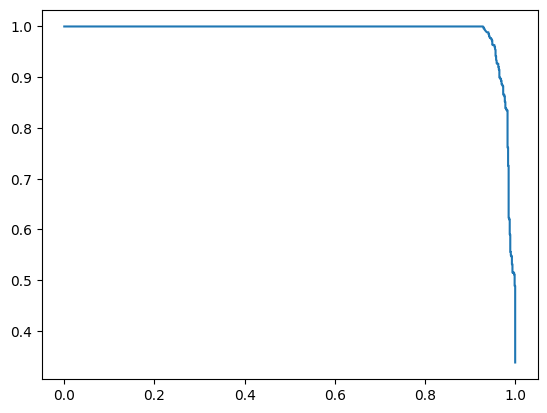

In [12]:
from sklearn.metrics import precision_recall_curve

precision_bl, recall_bl, threshold_bl = precision_recall_curve(y_train, predictions_proba_baseline[:,1],pos_label=1)

plt.plot(recall_bl, precision_bl);

In [13]:
prec_recall_bl_df = pd.DataFrame({'threshold':threshold_bl,
              'precision':precision_bl[:-1],
             'recall':recall_bl[:-1]})

In [14]:
selected_recall_bl_df = prec_recall_bl_df[prec_recall_bl_df['recall']>=0.70].\
sort_values(by='recall', ascending=True).\
reset_index(drop=True)

selected_recall_bl_df

,threshold,precision,recall
0,1.000000,1.000000,0.700121
1,1.000000,1.000000,0.701330
2,1.000000,1.000000,0.702539
3,1.000000,1.000000,0.703748
4,1.000000,1.000000,0.704958
...,...,...,...
1765,0.000001,0.426509,1.000000
1766,0.000001,0.426289,1.000000
1767,0.000001,0.426069,1.000000
1768,0.000001,0.425630,1.000000


In [15]:
adjusted_threshold_bl = selected_recall_bl_df.iloc[0]['threshold']
adjusted_threshold_bl

0.9999999992740625

# Trying to improve things further

This is good, we have sorted our problem with a simple basic solution. But can we get even better performances by doing clever data modelling, such as removing outliers and co-linear features, feature permutations, and hyperparameters tuning? Let's do it!

## Removing outliers

In [16]:
def remove_outliers(dataset):
    cols = dataset.columns

    for col in cols:
        dataset.loc[dataset[col] > 1000, col] = np.nan
        dataset.loc[dataset[col] < -1000, col] = np.nan
    return dataset

In [20]:
X_train = remove_outliers(X_train)

In [23]:
X_train.isnull().sum().sum()

105

## Checking for colinearity and simplifying the data

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

imputer = SimpleImputer().fit(X_train)
scaler = MinMaxScaler().fit(X_train)

columns = X_train.columns

X_train[columns] = imputer.transform(X_train[columns])
X_train[columns] = scaler.transform(X_train[columns])

In [25]:
def prepare_data(df):
    dataset = df.copy()
    prepared_data = remove_outliers(dataset)
    columns = dataset.columns
    dataset[columns] = imputer.transform(dataset[columns])
    dataset[columns] = scaler.transform(dataset[columns])
    return dataset

In [26]:
# Check for colinearity
corr_df = X_train.corr().unstack().reset_index()
corr_df.columns = ['Feature1', 'Feature2', 'Corr']
corr_df = corr_df[corr_df['Feature1'] != corr_df['Feature2']]
corr_df.Corr = np.abs(corr_df.Corr)
corr_df.sort_values(by='Corr', ascending=False, inplace=True)
corr_df[corr_df.Corr>0.7]
corr_df

,Feature1,Feature2,Corr
65118,xS58,yS183,0.926630
65698,yS183,xS58,0.926630
54089,xS60,yS72,0.911347
74099,yS72,xS60,0.911347
59909,yS60,yS72,0.901871
...,...,...,...
18197,xC20,xS190,0.000002
9223,yC127,xS144,0.000001
58813,xS144,yC127,0.000001
70992,xS50,yS154,0.000001


In [27]:
# Identify features with colinearity >0.6

redundant_features = []

for index,row in corr_df.iterrows():
    if (abs(row.Corr)>0.7 and (row.Feature1 not in redundant_features)):
        redundant_features.append(row.Feature2)

redundant_features = list(set(redundant_features))
redundant_features

['yS186', 'nS157', 'yS183', 'yS180', 'xS112', 'xS125', 'xS38', 'yS72', 'xS60']

In [28]:
# Adjusting X_train and X_test

X_train = X_train.drop(redundant_features, axis=1)

## Attempting feature permutations

In [30]:
model = LogisticRegression(max_iter=5000).fit(X_train,y_train)

permutation_score = permutation_importance(model, X_train, y_train, n_repeats = 100)

importance_df = pd.DataFrame(np.vstack((X_train.columns,
                                        permutation_score.importances_mean)).T)
importance_df.columns=['feature','importance']
importance_df.sort_values('importance', ascending=False, inplace=True)
importance_df.reset_index(drop=True, inplace=True)
importance_df

,feature,importance
0,xC17,0.009117
1,xC39,0.007511
2,xC5,0.006866
3,xC63,0.006518
4,xC36,0.005742
...,...,...
277,xC24,-0.0013
278,yC78,-0.001418
279,yC198,-0.001528
280,nS19,-0.001541


In [31]:
# Decide what columns to keep: 
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

precision_value = []
number_features = []

for i in range(1, importance_df.shape[0]):
    columns = importance_df.iloc[0:i].feature.values

    X_train_f = X_train[columns]

    prec = cross_val_score(LogisticRegression(max_iter=5000),
                   X=X_train_f, y=y_train, cv=5, n_jobs=-1, scoring='precision')

    number_features.append(i)
    precision_value.append(prec)

In [32]:
errors = [np.std(v) for v in precision_value]
prec_v = [np.mean(v) for v in precision_value]

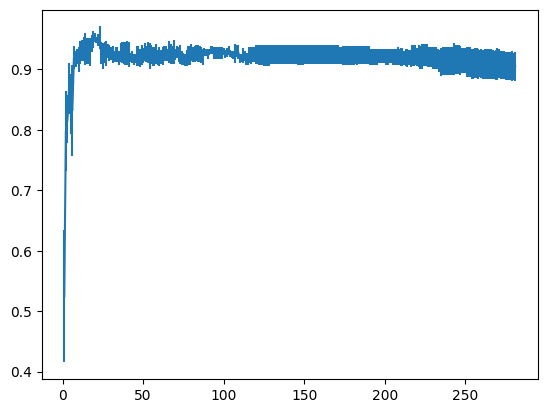

In [33]:
import matplotlib.pyplot as plt

plt.errorbar(number_features, prec_v,yerr=errors);

In [76]:
pdf = pd.DataFrame({'nb_features':number_features, 'precision':prec_v}).sort_values(by='precision', ascending=True)

In [77]:
pdf.sort_values(by=['precision','nb_features'], ascending=False, inplace=True)
pdf

,nb_features,precision
21,22,0.952840
22,23,0.952800
23,24,0.952514
19,20,0.951895
18,19,0.949258
...,...,...
5,6,0.832272
4,5,0.829971
2,3,0.818071
1,2,0.797989


In [78]:
# Decide what columns to keep: 

top_values = pdf.head(1).index[0]

top_features = importance_df.head(top_values).feature.values
top_features

array(['xC17', 'xC39', 'xC5', 'xC63', 'xC64', 'xC36', 'xC169', 'yC49',
       'xC143', 'xC62', 'xC38', 'xC142', 'xC2', 'xC87', 'xC20', 'xC124',
       'yC112', 'xC57', 'yC195', 'xC102', 'xC196'], dtype=object)

In [79]:
print(f'Selected number of features:{len(top_features)}')

Selected number of features:21


In [80]:
# Adjusting X_train
X_train = X_train[top_features]

In [35]:
X_train.describe()

,yC187,yC148,yC7,yC111,yC32,xC54,xC148,yC193,xC61,yC81,...,yS191,yS14,xS2,yS6,yC65,xC18,nS64,yC166,nS55,yS122
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,...,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,0.504723,0.511277,0.510310,0.516801,0.518601,0.491818,0.485279,0.524685,0.489351,0.513260,...,0.603093,0.981974,0.552443,0.454932,0.524193,0.489180,0.046532,0.524946,0.033123,0.372078
std,0.113230,0.115207,0.120969,0.113948,0.123494,0.101004,0.110652,0.114257,0.102321,0.120234,...,0.020054,0.024877,0.017278,0.028462,0.118970,0.105455,0.129412,0.120460,0.091612,0.023340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.498134,0.496269,0.500000,0.498134,0.498134,0.492537,0.498134,0.500000,0.500000,...,0.602935,0.983540,0.553108,0.454113,0.500000,0.490672,0.000000,0.500000,0.000000,0.373080
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.501873,0.500000,...,0.602935,0.983540,0.553108,0.454113,0.500000,0.500000,0.000000,0.500000,0.000000,0.373080
75%,0.500000,0.500000,0.500000,0.501866,0.500000,0.500000,0.500000,0.505597,0.503745,0.501866,...,0.602935,0.983540,0.553108,0.454113,0.525187,0.500000,0.045455,0.514925,0.052632,0.373080
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Number of Features: 1, Model Performance (Accuracy): 0.6592
Number of Features: 2, Model Performance (Accuracy): 0.7707
Number of Features: 3, Model Performance (Accuracy): 0.7773
Number of Features: 4, Model Performance (Accuracy): 0.7822
Number of Features: 5, Model Performance (Accuracy): 0.7793
Number of Features: 6, Model Performance (Accuracy): 0.7805
Number of Features: 7, Model Performance (Accuracy): 0.7863
Number of Features: 8, Model Performance (Accuracy): 0.7965
Number of Features: 9, Model Performance (Accuracy): 0.8030
Number of Features: 10, Model Performance (Accuracy): 0.7989
Number of Features: 11, Model Performance (Accuracy): 0.7985
Number of Features: 12, Model Performance (Accuracy): 0.8026
Number of Features: 13, Model Performance (Accuracy): 0.8108
Number of Features: 14, Model Performance (Accuracy): 0.8190
Number of Features: 15, Model Performance (Accuracy): 0.8177
Number of Features: 16, Model Performance (Accuracy): 0.8230
Number of Features: 17, Model Per

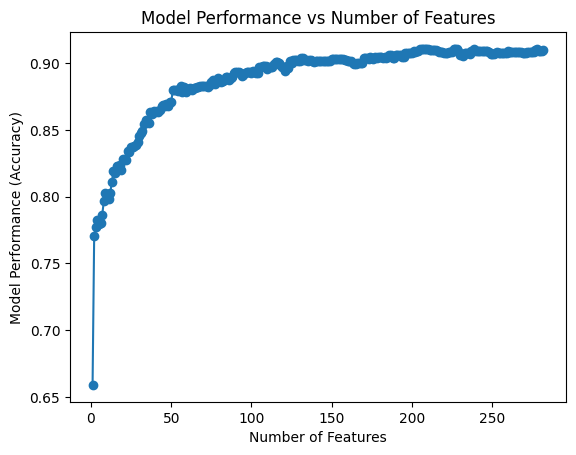

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# 假设 X_train, y_train 已经定义

# 创建 Logistic Regression 模型
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

# 计算原始模型在交叉验证上的准确度
original_score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

# 计算 Permutation Importance
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

# 获取特征的排列重要性
feature_importance = perm_importance.importances_mean

# 按照 Permutation Importance 的顺序逐步选择不同数量的特征
num_features = range(1, len(X_train.columns) + 1)
performance_scores = []

for num in num_features:
    # 选择排列重要性最高的前 num 个特征
    selected_features = X_train.columns[:num]
    
    # 创建模型
    model = LogisticRegression(max_iter=5000)
    
    # 计算模型性能
    score = cross_val_score(model, X_train[selected_features], y_train, cv=5, scoring='accuracy').mean()
    
    # 存储特征数量和对应的性能得分
    performance_scores.append((num, score))

# 打印每个特征数量和对应的性能得分
for num, score in performance_scores:
    print(f'Number of Features: {num}, Model Performance (Accuracy): {score:.4f}')

# 可视化
num_features, scores = zip(*performance_scores)
plt.plot(num_features, scores, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Model Performance (Accuracy)')
plt.title('Model Performance vs Number of Features')
plt.show()


## Hyperparameter tuning

In [81]:
# Let's perform a RandomizeSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score, precision_score
from scipy import stats

params = {'penalty':['l1','l2'],
          'C':stats.expon(0.01, 5000),
          'class_weight':[None, 'balanced'],
          'solver':['liblinear', 'saga']
         }

cv = RandomizedSearchCV(estimator=LogisticRegression(max_iter=5000), param_distributions=params,
                       n_jobs=-1, n_iter=10,scoring='precision',cv=5, verbose=1)

In [82]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x293dcfb10>,
                                        'class_weight': [None, 'balanced'],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']},
                   scoring='precision', verbose=1)

In [83]:
cv.best_score_

0.9384392829517983

In [84]:
cv.best_params_

{'C': 3840.367560001431,
 'class_weight': None,
 'penalty': 'l1',
 'solver': 'saga'}

In [85]:
model = cv.best_estimator_

In [86]:
predictions_proba = model.predict_proba(X_train)
predictions = model.predict(X_train)

## Threshold adjustement on new model

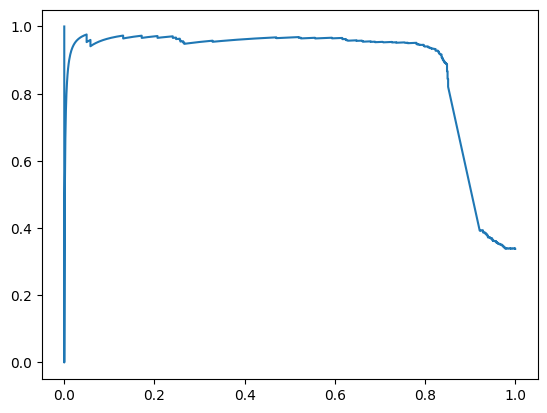

In [87]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, predictions_proba[:,1],pos_label=1)

plt.plot(recall, precision);

In [88]:
prec_recall_df = pd.DataFrame({'threshold':threshold,
              'precision':precision[:-1],
             'recall':recall[:-1]})

In [89]:
selected_recall_df = prec_recall_df[prec_recall_df['recall']>=0.70].\
sort_values(by='recall', ascending=True).\
reset_index(drop=True)

selected_recall_df

,threshold,precision,recall
0,6.613342e-01,0.953871,0.700121
1,6.606840e-01,0.953947,0.701330
2,6.605886e-01,0.954023,0.702539
3,6.601992e-01,0.954098,0.703748
4,6.596872e-01,0.954173,0.704958
...,...,...,...
723,3.638100e-05,0.339630,1.000000
724,9.019789e-05,0.339770,1.000000
725,1.144882e-04,0.339910,1.000000
726,9.765644e-06,0.338934,1.000000


In [90]:
adjusted_threshold = selected_recall_df.iloc[24]['threshold']
adjusted_threshold

0.6214126778279685

## Creating a function to automated the prediction

In [91]:
def predict_swarm(selected_model, selected_X, selected_threshold = 0.5):
    preds = selected_model.predict_proba(selected_X)
    preds = pd.DataFrame(preds[:,1])
    return preds[0].apply(lambda x: 0 if x<selected_threshold else 1)

In [92]:
def test_models(title, X_unknown, y_true):
    d=X_unknown.copy()
    pred_base = predict_swarm(baseline_model, X_unknown)
    pred_base_adjusted = predict_swarm(baseline_model, X_unknown, adjusted_threshold_bl)
    pred_best = predict_swarm(model, prepare_data(X_unknown)[top_features], adjusted_threshold)
    pred_best_unadjusted = predict_swarm(model, prepare_data(X_unknown)[top_features],0.5)
    
    all_models = [pred_base,pred_base_adjusted,pred_best,pred_best_unadjusted]
    all_names = ['Base model', 'Base model adjusted', 'Best model', 'Best model no adjustement']

    print (title)
    for model_result,name in zip(all_models, all_names):
        print(name)
        print(f'Precision:{precision_score(y_true, model_result)}')
        print(f'Recall:{recall_score(y_true, model_result)}')
        
    print('\n')

In [93]:
test_models('TEST ON TEST SET', X_test, y_test)

TEST ON TEST SET
Base model
Precision:0.8598726114649682
Recall:0.8181818181818182
Base model adjusted
Precision:0.9083665338645418
Recall:0.6909090909090909
Best model
Precision:0.905511811023622
Recall:0.696969696969697
Best model no adjustement
Precision:0.8996282527881041
Recall:0.7333333333333333




In [94]:
model.fit(prepare_data(X)[top_features],y)

LogisticRegression(C=3840.367560001431, max_iter=5000, penalty='l1',
                   solver='saga')

In [95]:
final_model = model

In [96]:
predictions = final_model.predict(prepare_data(unknown_behaviour)[top_features])

### ☑️ Test your code

Note: this only tests if you achieve the mandated **precision** and **recall** on an unseen dataset. It does not check the quality of your code or the completeness of your answer.


In [97]:
from nbresult import ChallengeResult

result = ChallengeResult('final_classifier',
                         predictions = predictions,
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.11.2, pytest-7.4.2, pluggy-1.3.0 -- /Users/cedric/.pyenv/versions/3.10/envs/dsml4pe/bin/python3
cachedir: .pytest_cache
rootdir: /Users/cedric/code/cedricmjohn/teaching/PG-Machine-Learning/Machine-Learning-for-Planet-Earth-Practicals/07-Ensemble-Methods/03-Swarm-Behaviour/tests
plugins: anyio-4.0.0
collecting ... collected 2 items

test_final_classifier.py::TestFinal_classifier::test_precision PASSED    [ 50%]
test_final_classifier.py::TestFinal_classifier::test_recall PASSED       [100%]

============================== 2 passed in 0.53s ===============================


💯 You can commit your code:

git add tests/final_classifier.pickle

git commit -m 'Completed final_classifier step'

git push origin master



# Optional Extension

If you are done with the previous exercise, you are free to try `Ensemble methods` (including `XGBoost`) to see if you can outperform the `LogisticRegression`). Have fun!

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.